In [1]:
import torch
from model import Encoder, CharTokenizer
from trainer import train
from data import get_datasets
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.cuda.current_device()
else:
    device = 'cpu'

print(device)

/users/thua5/.conda/envs/llava/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0


In [2]:
train_dataset, test_dataset = get_datasets()

Loading preprocessed train data...


In [3]:
!ls ckpts/

model_WSIZE_1024_20240423_2022.pt
model_WSIZE_1024_noise_20240425_1333.pt
model_WSIZE_1024_raw_20240429_1200.pt
model_WSIZE_1024_woATTN_20240502_1729.pt
model_WSIZE_1024_woATTN_20240503_0031.pt
model_WSIZE_1024_woCNN_20240429_1303.pt
model_WSIZE_128_20240423_1651.pt
model_WSIZE_128_20240423_2022.pt
model_WSIZE_128_noise_20240425_1333.pt
model_WSIZE_128_raw_20240429_1200.pt
model_WSIZE_128_woATTN_20240503_1028.pt
model_WSIZE_128_woCNN_20240429_1304.pt
model_WSIZE_256_20240423_1649.pt
model_WSIZE_256_20240423_2022.pt
model_WSIZE_256_noise_20240425_1333.pt
model_WSIZE_256_raw_20240429_1200.pt
model_WSIZE_256_woATTN_20240503_0037.pt
model_WSIZE_256_woCNN_20240429_1304.pt
model_WSIZE_512_20240423_2022.pt
model_WSIZE_512_noise_20240425_1333.pt
model_WSIZE_512_raw_20240429_1200.pt
model_WSIZE_512_woATTN_20240502_1728.pt
model_WSIZE_512_woATTN_20240503_1103.pt
model_WSIZE_512_woCNN_20240429_1303.pt
model_WSIZE_64_20240423_1651.pt
model_WSIZE_64_20240423_2007.pt
model_WSIZE_64_20240423_2022.pt


In [5]:
my_tokenizer = CharTokenizer()

WSIZE = 1024

my_model = Encoder(WSIZE, 37+1, 256, num_blocks=4, n_heads=8, dropout=0.0, all_activations=True, use_cnn=True, use_attn=True) # window_size, vocab_size, embed_size

my_model.load_state_dict(torch.load("./ckpts/model_WSIZE_1024_20240423_2022.pt"))
# my_model.load_state_dict(torch.load("./ckpts/model_WSIZE_1024_20240423_2022.pt"))

my_model.to(device)

# optimizer = torch.optim.Adam(my_model.parameters(), weight_decay=0.001)
# loss_func = torch.nn.CrossEntropyLoss()

# train(my_model, train_dataset, optimizer, loss_func, my_tokenizer, batch_size=16, n_epochs=10, device=device, mask_ratio=0.0)

Encoder(
  (word_embedding): Embedding(38, 256)
  (pos_embedding): Embedding(1024, 256)
  (blocks): ModuleList(
    (0-3): 4 x TransformerBlock(
      (cnn): CharCNN(
        (c3): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
        (c5): Conv1d(256, 256, kernel_size=(5,), stride=(1,), padding=(2,))
        (c7): Conv1d(256, 256, kernel_size=(7,), stride=(1,), padding=(3,))
        (c9): Conv1d(256, 256, kernel_size=(9,), stride=(1,), padding=(4,))
        (c11): Conv1d(256, 256, kernel_size=(11,), stride=(1,), padding=(5,))
        (c3sep): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
        (c5sep): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
        (c7sep): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
        (c9sep): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
        (c11sep): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
        (c3_prime): Conv1d(1280, 256, kernel_size=(3,), stride=(1,), padding=(1,))
        (leakyrelu1): LeakyReLU(negative_s

In [39]:
from utils import Subst_cipher, unigram_freq_decipher, CHAR_SPACE
from data import preprocess_str
from model import freq_encoder
from metrics import character_accuracy


def logitsToStr(tokenizer, logits):
    return ''.join(tokenizer.decode([int(i) for i in logits.argmax(-1)[0].cpu()]))


astring = """I wasnt sure how I was gonna do it but I knew what I had to do.  Some might ask how someone could have such a strong love for someone they barley even knew, the truth is I couldn't even answer that question if I tried.  Everyone knows the saying "The heart wants what the heart wants", well at that moment she was what my heart desired most and I was willing to do anything to keep her. The rest of the ride to my house was in silence, for some reason I still couldnt wrap my mind around what has happened and what was happening.  We pulled up to my houes and went upstairs to my room to talk.  "I understand if this is to much for you to handle." she said with a sad worried look on her face "What do you mean?" I asked "You are one of the sweetest guys i've ever met and i would hate for anything bad to happen to you because of me" she replied tears slowly falling from her eyes. "Nothing bad is gonna happen to me" I said grabbing her and holding her close to comfort her.  "I'm happy being with you and I don't want to lose you over some problems between your dad and some other men and I refuse to let you leave knowing I can't be with you."
"""

plain = preprocess_str(astring)[:WSIZE]

In [40]:
print(plain.__len__())
print(plain)

1024
i wasnt sure how i was gonna do it but i knew what i had to do some might ask how someone could have such a strong love for someone they barley even knew the truth is i couldnt even answer that question if i tried everyone knows the saying the heart wants what the heart wants well at that moment she was what my heart desired most and i was willing to do anything to keep her the rest of the ride to my house was in silence for some reason i still couldnt wrap my mind around what has happened and what was happening we pulled up to my houes and went upstairs to my room to talk i understand if this is to much for you to handle she said with a sad worried look on her face what do you mean i asked you are one of the sweetest guys ive ever met and i would hate for anything bad to happen to you because of me she replied tears slowly falling from her eyes nothing bad is gonna happen to me i said grabbing her and holding her close to comfort her im happy being with you and i dont want to los

In [41]:
ciphertext = Subst_cipher().encrypt(plain)
''.join(ciphertext)

'c h7uni u0vd geh c h7u 8enn7 le ci 40i c andh hg7i c g7l ie le ue1d 1c8gi 7ua geh ue1dend ke06l g7fd u0kg 7 uiven8 6efd 3ev ue1dend igdw 47v6dw dfdn andh igd iv0ig cu c ke06lni dfdn 7nuhdv ig7i y0duicen c3 c ivcdl dfdvwend anehu igd u7wcn8 igd gd7vi h7niu hg7i igd gd7vi h7niu hd66 7i ig7i 1e1dni ugd h7u hg7i 1w gd7vi lducvdl 1eui 7nl c h7u hc66cn8 ie le 7nwigcn8 ie addm gdv igd vdui e3 igd vcld ie 1w ge0ud h7u cn uc6dnkd 3ev ue1d vd7uen c uic66 ke06lni hv7m 1w 1cnl 7ve0nl hg7i g7u g7mmdndl 7nl hg7i h7u g7mmdncn8 hd m066dl 0m ie 1w ge0du 7nl hdni 0mui7cvu ie 1w vee1 ie i76a c 0nldvui7nl c3 igcu cu ie 10kg 3ev we0 ie g7nl6d ugd u7cl hcig 7 u7l hevvcdl 6eea en gdv 37kd hg7i le we0 1d7n c 7uadl we0 7vd end e3 igd uhddidui 80wu cfd dfdv 1di 7nl c he06l g7id 3ev 7nwigcn8 47l ie g7mmdn ie we0 4dk70ud e3 1d ugd vdm6cdl id7vu u6eh6w 3766cn8 3ve1 gdv dwdu neigcn8 47l cu 8enn7 g7mmdn ie 1d c u7cl 8v744cn8 gdv 7nl ge6lcn8 gdv k6eud ie ke13evi gdv c1 g7mmw 4dcn8 hcig we0 7nl c leni h7ni ie 6eud we

In [42]:
my_model.blocks[0].use_attn = True
my_model.blocks[1].use_attn = True
my_model.blocks[2].use_attn = True
my_model.blocks[3].use_attn = True

In [43]:
ciphertext_batch = torch.tensor([freq_encoder(my_tokenizer.encode(ciphertext))], dtype=torch.long).to(device)
# ciphertext_batch = torch.tensor([my_tokenizer.encode(ciphertext)], dtype=torch.long).to(device)
logits, activations = my_model(ciphertext_batch)

In [44]:
plain_pred = logitsToStr(my_tokenizer, logits)
plain_pred

'i wasnt sure how i was gonna do it but i knew what i had to do some might ask how someone vould have such a strong love for someone they barley even knew the truth is i vouldnt even answer that question if i tried everyone knows the saying the heart wants what the heart wants well at that moment she was what my heart desired most and i was willing to do anything to keep her the rest of the ride to my house was in silenve for some reason i still vouldnt wrap my mind around what has happened and what was happening we pulled up to my houes and went upstairs to my room to talk i understand if this is to much for you to handle she said with a sad worried look on her fave what do you mean i asked you are one of the sweetest guys ive ever met and i would hate for anything wad to happen to you because of me she replied tears slowly falling from her eyes nothing wad is gonna happen to me i said grabbing her and holding her close to comfort her im happy being with you and i dont want to lose yo

In [45]:
plain

'i wasnt sure how i was gonna do it but i knew what i had to do some might ask how someone could have such a strong love for someone they barley even knew the truth is i couldnt even answer that question if i tried everyone knows the saying the heart wants what the heart wants well at that moment she was what my heart desired most and i was willing to do anything to keep her the rest of the ride to my house was in silence for some reason i still couldnt wrap my mind around what has happened and what was happening we pulled up to my houes and went upstairs to my room to talk i understand if this is to much for you to handle she said with a sad worried look on her face what do you mean i asked you are one of the sweetest guys ive ever met and i would hate for anything bad to happen to you because of me she replied tears slowly falling from her eyes nothing bad is gonna happen to me i said grabbing her and holding her close to comfort her im happy being with you and i dont want to lose yo

In [46]:
character_accuracy(plain, plain_pred)

0.9921875

In [160]:
plain_pred.find("capping")

218

In [47]:
import difflib

def char_level_html_diff(text1, text2):
    assert len(text1) == len(text2), "Strings must be of the same length"

    result = []
    for char1, char2 in zip(text1, text2):
        if char1 == char2:
            result.append(f"<span>{char1}</span>")
        else:
            result.append(f"<span style='background-color: #EF9A9A;'>{char2}</span>")
    return "".join(result)

diff_html = char_level_html_diff(plain, plain_pred)
with open('diff.html', 'w') as f:
    f.write(diff_html)

In [115]:
from utils import unigram_freq_decipher

unigram_freq_decipher(ciphertext)

'oerd lastioahrd hamleos hrn lrve r dit ip niase tlasniase hrn hife poif tle nrtuord cegorcrtain ip lastioahrd cihufents lufrn fastr0es cuoang r frnurd tornshoamtain moihess io fassmeddec yiocs bw tle rutlio rs an tle jicarhx93 hamleo niase hrn rdsi hife poif rutifrtahrddw tornshoabang lastioahrd hamleos usang imtahrd hlrorhteo oehignatain iho tehlna8ues at as tlus houhard ti lrve r oibust cehamleofent ficed tlrt hrn stadd horh0 hamleos cesmate tle niase lrueo et rd test tleao moimisec fetlic in niasw hamleos hoertec bw orncifdw hiooumtang digkn ip tle hamleote2t hlrorhteos liyeveo rutifrtah tornshoamtain ip lastioahrd cihufents as veow hlrddengang rnc hrn antoicuhe fioe twmes ip niase anhducang tle rccatain rnc cedetain ip sife hlrorhteos cuoang hlrorhteo segfentrtain ye test iuo ficed in tloee twmes ip orncif niase anseotain cedetain rnc substatutain ye e2meoafent yatl cappeoent niase meohentrges pio hamleos ip dengtl k15 trbde 1 ye oemiot tle oesudts ip toranang rnc testang in hamle

In [172]:
character_accuracy(plain, unigram_freq_decipher(ciphertext))

0.18359375

In [173]:
activations[0].shape

torch.Size([1, 512, 256])

In [146]:
logitsToStr(my_tokenizer, my_model.output(activations[0].to(device)))

'ttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt

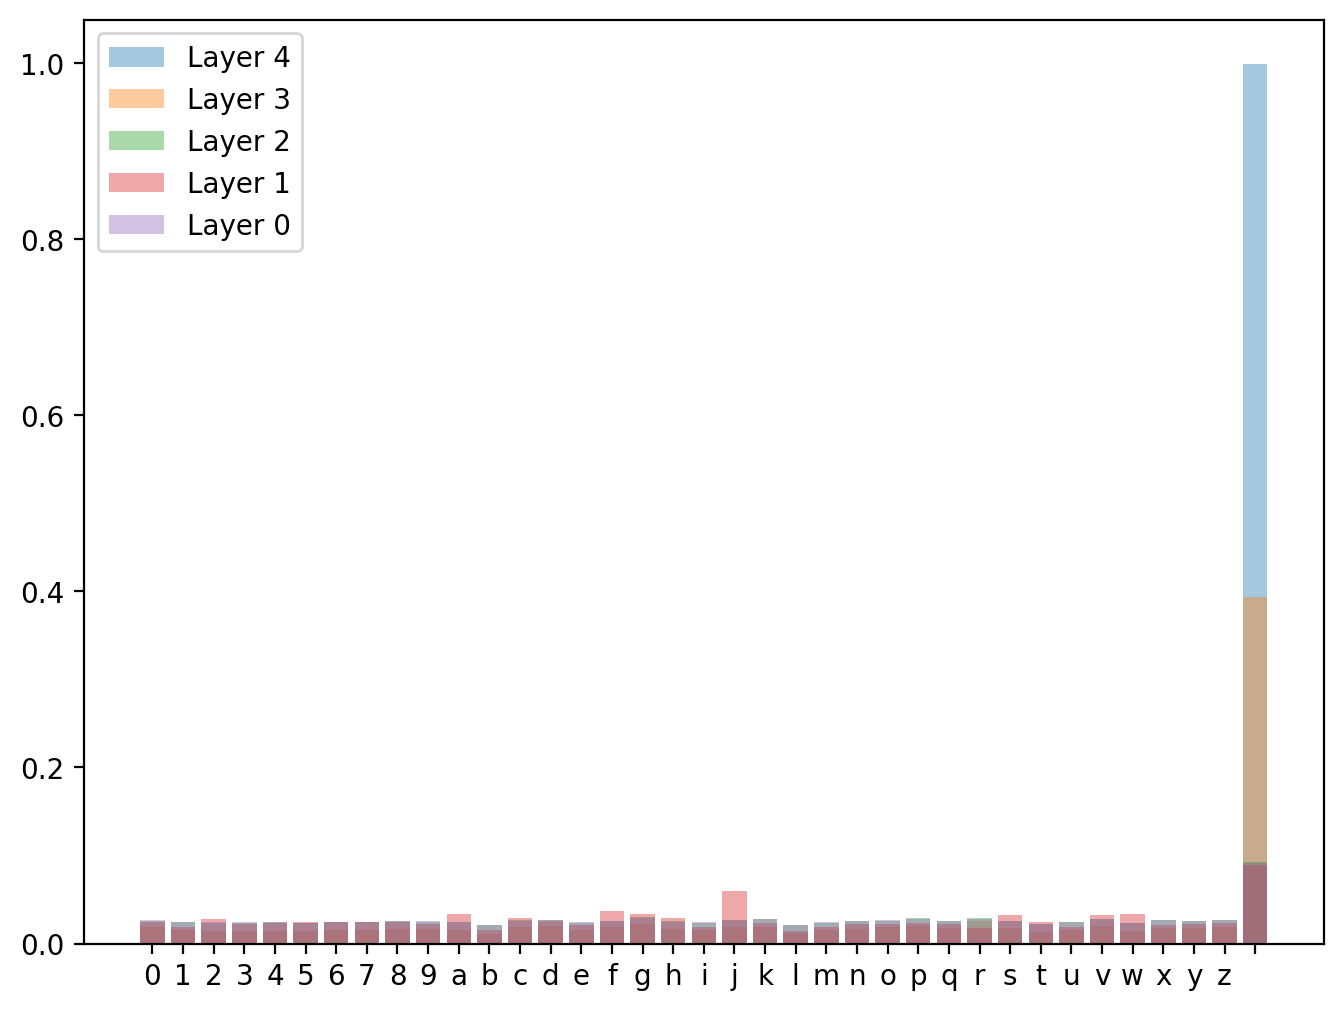

In [162]:
POSIDX=217

plt.figure(figsize=(8,6), dpi=200)

for i in range(4,-1,-1):
    plt.bar(CHAR_SPACE, torch.softmax(my_model.output(activations[i].to(device)).detach().cpu()[0][POSIDX][:len(CHAR_SPACE)], -1), label=f"Layer {i}", alpha=0.4)

plt.legend()
plt.show()

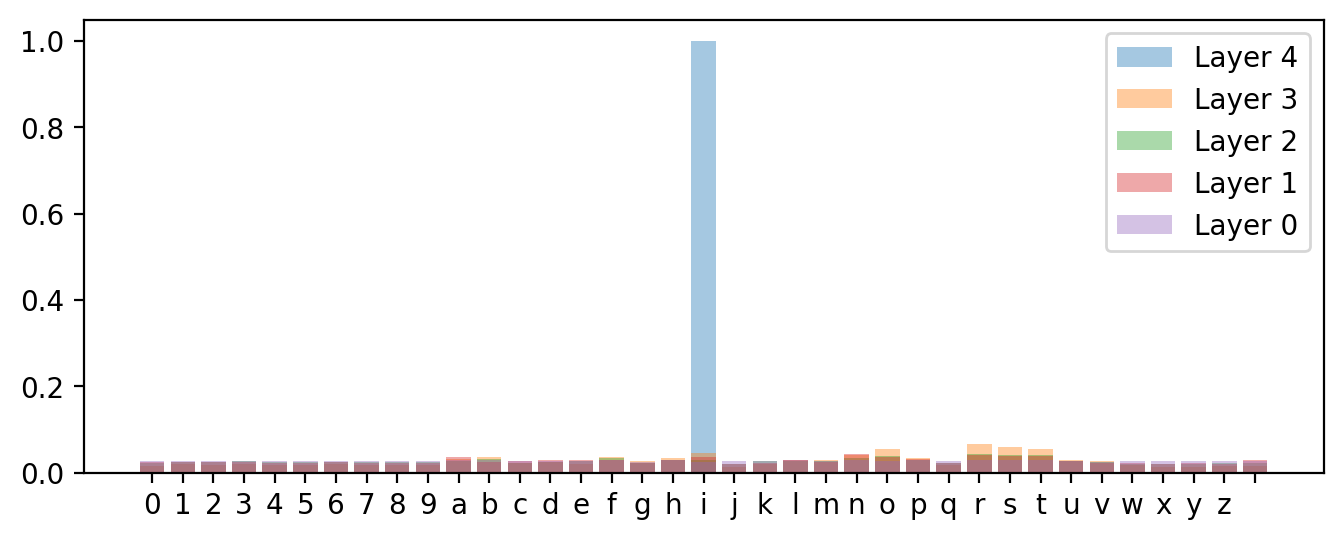

In [226]:
POSIDX=10

plt.figure(figsize=(8,3), dpi=200)

for i in range(4,-1,-1):
    plt.bar(CHAR_SPACE, torch.softmax(my_model.output(activations[i].to(device)).detach().cpu()[0][POSIDX][:len(CHAR_SPACE)], -1), label=f"Layer {i}", alpha=0.4)

plt.legend()
plt.show()

In [13]:
from datasets import load_dataset

dataset = load_dataset("brunokreiner/genius-lyrics")

In [14]:
import numpy as np

In [15]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'id', 'lyrics', 'is_english', 'genres_list', 'popularity', 'release_date', 'artist_id', 'artist_name', 'artist_popularity', 'artist_followers', 'artist_picture_url'],
        num_rows: 480855
    })
})


In [16]:
length = len(dataset['train']['lyrics'])
data_l = dataset['train']['lyrics']
random_numbers = np.random.randint(0, length + 1, 200)
lyrics_list = []
for i in range(200):
    idx = random_numbers[i]
    if dataset['train']['is_english']:
        lyrics_list.append(data_l[idx])
print(len(lyrics_list))

200


In [17]:
WSIZE = 1024
accs = []
for i in range(200):
    astring = lyrics_list[i]
    plain = preprocess_str(astring)[:WSIZE]
    ciphertext = Subst_cipher().encrypt(plain)
    ''.join(ciphertext)
    ciphertext_batch = torch.tensor([freq_encoder(my_tokenizer.encode(ciphertext))], dtype=torch.long).to(device)
    # ciphertext_batch = torch.tensor([my_tokenizer.encode(ciphertext)], dtype=torch.long).to(device)
    logits, activations = my_model(ciphertext_batch)
    plain_pred = logitsToStr(my_tokenizer, logits)
    acc = character_accuracy(plain, plain_pred)
    accs.append(acc)
print(np.mean(accs))

0.8010245619902332


In [21]:
dataset2 = load_dataset("merve/poetry")
print(dataset2)

Repo card metadata block was not found. Setting CardData to empty.


DatasetDict({
    train: Dataset({
        features: ['author', 'content', 'poem name', 'age', 'type'],
        num_rows: 573
    })
})


In [22]:
length = len(dataset2['train']['content'])
data_l = dataset2['train']['content']
random_numbers = np.random.randint(0, length + 1, 200)
poem_list = []
for i in range(200):
    idx = random_numbers[i]
    poem_list.append(data_l[idx])
print(len(poem_list))
print(poem_list[0])

200
Pray why are you so bare, so bare,
   Oh, bough of the old oak-tree;
And why, when I go through the shade you throw,
   Runs a shudder over me?

My leaves were green as the best, I trow,
   And sap ran free in my veins,
But I say in the moonlight dim and weird
   A guiltless victim's pains.

I bent me down to hear his sigh;
   I shook with his gurgling moan,
And I trembled sore when they rode away,
   And left him here alone.

They'd charged him with the old, old crime,
   And set him fast in jail:
Oh, why does the dog howl all night long,
   And why does the night wind wail?

He prayed his prayer and he swore his oath,
   And he raised his hand to the sky;
But the beat of hoofs smote on his ear,
   And the steady tread drew nigh.

Who is it rides by night, by night,
   Over the moonlit road?
And what is the spur that keeps the pace,
   What is the galling goad?

And now they beat at the prison door,
   "Ho, keeper, do not stay!
We are friends of him whom you hold within,
   And we

In [26]:
WSIZE = 1024
accs = []
for i in range(200):
    astring = poem_list[i]
    plain = preprocess_str(astring)[:WSIZE]
    ciphertext = Subst_cipher().encrypt(plain)
    ''.join(ciphertext)
    ciphertext_batch = torch.tensor([freq_encoder(my_tokenizer.encode(ciphertext))], dtype=torch.long).to(device)
    # ciphertext_batch = torch.tensor([my_tokenizer.encode(ciphertext)], dtype=torch.long).to(device)
    logits, activations = my_model(ciphertext_batch)
    plain_pred = logitsToStr(my_tokenizer, logits)
    acc = character_accuracy(plain, plain_pred)
    accs.append(acc)
print(np.mean(accs))

0.840285966931138


In [28]:
dataset3 = load_dataset("scientific_papers",'arxiv')
print(dataset3)

Generating test split: 100%|██████████| 6440/6440 [00:03<00:00, 1685.08 examples/s]


DatasetDict({
    train: Dataset({
        features: ['article', 'abstract', 'section_names'],
        num_rows: 203037
    })
    validation: Dataset({
        features: ['article', 'abstract', 'section_names'],
        num_rows: 6436
    })
    test: Dataset({
        features: ['article', 'abstract', 'section_names'],
        num_rows: 6440
    })
})


In [32]:
length = len(dataset3['train']['abstract'])
data_l = dataset3['train']['abstract']
random_numbers = np.random.randint(0, length + 1, 200)
abstract_list = []
for i in range(200):
    idx = random_numbers[i]
    abstract_list.append(data_l[idx])
print(len(abstract_list))
print(abstract_list[0])

200
 we show the existence of a stable algebraic spin liquid ( asl ) phase in a hubbard model defined on a honeycomb lattice with spin - dependent hopping that breaks time - reversal symmetry . 
 the effective spin model is the kitaev model for large on - site repulsion . 
 the gaplessness of the emergent majorana fermions is protected by the time - reversal invariance of this model . 
 we prove that the effective spin model is time - reversal invariant in the entire mott phase , thus ensuring the stability of the asl . 
 the model can be physically realized in cold atom systems , and we propose experimental signals of the asl .    
 the concept of a spin liquid as a mott phase without any local magnetic order was put forward by anderson @xcite . 
 its relevance to the physics of high - temperature superconductors@xcite led to the development of a gauge theory of spin liquids @xcite , analogous to quantum electrodynamics(qed ) . 
 the spinons are the counterpart of electrons in qed , a

In [33]:
WSIZE = 1024
accs = []
for i in range(200):
    astring = abstract_list[i]
    plain = preprocess_str(astring)[:WSIZE]
    ciphertext = Subst_cipher().encrypt(plain)
    ''.join(ciphertext)
    ciphertext_batch = torch.tensor([freq_encoder(my_tokenizer.encode(ciphertext))], dtype=torch.long).to(device)
    # ciphertext_batch = torch.tensor([my_tokenizer.encode(ciphertext)], dtype=torch.long).to(device)
    logits, activations = my_model(ciphertext_batch)
    plain_pred = logitsToStr(my_tokenizer, logits)
    acc = character_accuracy(plain, plain_pred)
    accs.append(acc)
print(np.mean(accs))

0.9263392230854254


In [35]:
dataset4 = load_dataset("AlekseyKorshuk/fiction-books")
print(dataset4)

DatasetDict({
    train: Dataset({
        features: ['url', 'text'],
        num_rows: 4737
    })
})


In [37]:
length = len(dataset4['train']['text'])
data_l = dataset4['train']['text']
random_numbers = np.random.randint(0, length + 1, 200)
abstract_list = []
for i in range(200):
    idx = random_numbers[i]
    abstract_list.append(data_l[idx])
print(len(abstract_list))
print(abstract_list[0])

200
Andrew Matthews CHASE To the one that got away 
 
 
 My Lucky Day 
 
I saw her walk through the crowded hallways everyday.  The way the light glistened off her caramel skin had me star struck.  Her beautiful face astounded me as it went perfectly with her intriguing light brown eyes.  The days went by slowly and I still couldn’t muster up the courage to walk her way.  To her I was a shadow among shadows, invisible to her and so many others.  The world worked in many awkward ways I guess, because this particular day was my lucky day.  Lacy was in my algebra 2 class, and being smart actually came in handy for once.  I overheard Lacy and Mr. Tate talking he told her that she was flunking and the only way she could pass the semester is passing our upcoming exam.  This was my chance, maybe the only once in a lifetime chance you get when you find that special one. “Hey Lacy you might not know me but I’m Bret I’m in your algebra 2 class and I couldn’t help but hear about your problem.” I 

In [38]:
WSIZE = 1024
accs = []
for i in range(200):
    astring = abstract_list[i]
    plain = preprocess_str(astring)[:WSIZE]
    ciphertext = Subst_cipher().encrypt(plain)
    ''.join(ciphertext)
    ciphertext_batch = torch.tensor([freq_encoder(my_tokenizer.encode(ciphertext))], dtype=torch.long).to(device)
    # ciphertext_batch = torch.tensor([my_tokenizer.encode(ciphertext)], dtype=torch.long).to(device)
    logits, activations = my_model(ciphertext_batch)
    plain_pred = logitsToStr(my_tokenizer, logits)
    acc = character_accuracy(plain, plain_pred)
    accs.append(acc)
print(np.mean(accs))

0.8253606847127992
